# Autor: Landeros Espinoza Jesus Enrique

# Task One

# Prediction using Supervised ML

## Load the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression

## Read the Data

In [2]:
data=pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
count_of_missval_by_col = (data.isnull().sum()) #Check for missing values
count_of_missval_by_col

Hours     0
Scores    0
dtype: int64

Text(0.5, 1.0, 'Hours vs Scores')

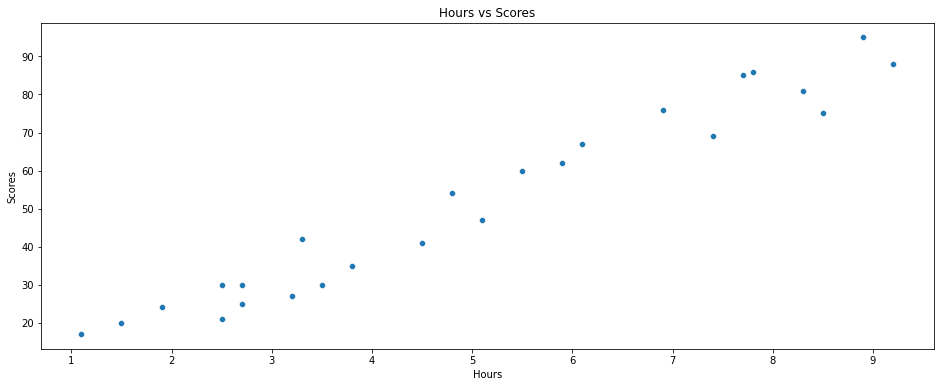

In [6]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Hours',y='Scores', data=data)
plt.title('Hours vs Scores')


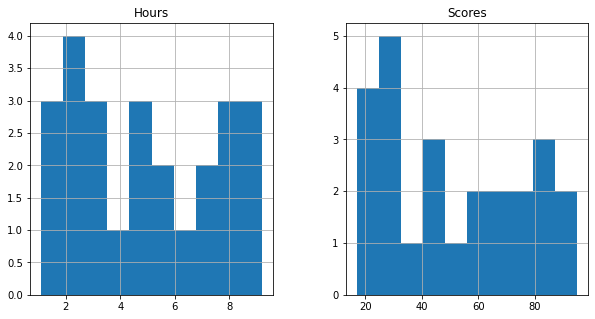

In [7]:
data.hist(bins=10, figsize=(10,5))
plt.show()

In [8]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


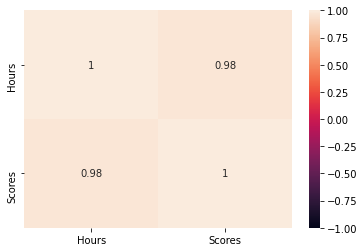

In [9]:
sns.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True);

## Assigning Variables

In [10]:
X=data['Hours']
y=data['Scores']

In [11]:
X=X.to_numpy().reshape(-1, 1)

In [12]:
y=y.values

## Standardize Data

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Split the Data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X , y, test_size = 0.2)

## Train the Model

In [15]:
lm = LinearRegression()

In [16]:
model = lm.fit(X_train, Y_train)

In [17]:
y_pred = lm.predict(X_test)

In [18]:
y_pred

array([26.54288069, 20.62901632, 28.51416881, 33.44238912, 34.42803319])

## Evaluation

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [20]:
print('Regression Model, coefficients: ', lm.coef_)
print("Mean absolute error for Test Data: {:.2f}".format(mean_absolute_error(Y_test, y_pred)))
print("Mean squared error for Test Data: {:.2f}".format(mean_squared_error(Y_test, y_pred)))
print("Root mean squared error for Test Data: {:.2f}".format(mean_squared_error(Y_test, y_pred, squared=False)))
print("r2_score: {:.2f}".format(r2_score(Y_test, y_pred)))

Regression Model, coefficients:  [24.38559104]
Mean absolute error for Test Data: 4.87
Mean squared error for Test Data: 26.90
Root mean squared error for Test Data: 5.19
r2_score: 0.37


## Prediction Using Test Data

In [21]:
predictions = pd.Series(y_pred)

In [22]:
Y_test

array([30, 24, 25, 27, 42])

In [23]:
df = pd.DataFrame(Y_test, columns = ['Original Values'])

In [24]:
df["Predicted Values"] = predictions
df

,Original Values,Predicted Values
0,30,26.542881
1,24,20.629016
2,25,28.514169
3,27,33.442389
4,42,34.428033


## Prediction Using New Data Data

In [25]:
test_data = {'Hours':[2.3,5.2,4.1,7.4,8.2,4.5,9.2,1.5,1.3,1.4,3.6,4.5]} 
test_data_df = pd.DataFrame(test_data)  
test_data_df

,Hours
0,2.3
1,5.2
2,4.1
3,7.4
4,8.2
5,4.5
6,9.2
7,1.5
8,1.3
9,1.4


In [26]:
new_X=test_data_df['Hours']
new_X=new_X.to_numpy().reshape(-1, 1)

In [27]:
scaler = StandardScaler()
snew_X = scaler.fit_transform(new_X)

In [28]:
new_pred = lm.predict(snew_X)

In [29]:
new_predictions = pd.Series(new_pred)

In [30]:
new_df = pd.DataFrame(new_X, columns = ['Hours'])

In [31]:
new_df["Predicted Score"] = new_predictions
new_df

,Hours,Predicted Score
0,2.3,31.063563
1,5.2,58.575541
2,4.1,48.139963
3,7.4,79.446698
4,8.2,87.036209
5,4.5,51.934719
6,9.2,96.523098
7,1.5,23.474051
8,1.3,21.576673
9,1.4,22.525362


## Predictions Using Polynomial Regression Using 4 Degrees

### Split Data and Train the Model

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

XP_train, XP_test, yp_train, yp_test = train_test_split(X_poly, y,
                                                   random_state = 0)
linreg = LinearRegression().fit(XP_train, yp_train)


### Evaluation

In [33]:
yp_pred = linreg.predict(XP_test)

In [34]:
print('Regression Model, coefficients: ', linreg.coef_)
print("Mean absolute error for Test Data: {:.2f}".format(mean_absolute_error(yp_test, yp_pred)))
print("Mean squared error for Test Data: {:.2f}".format(mean_squared_error(yp_test, yp_pred)))
print("Root mean squared error for Test Data: {:.2f}".format(mean_squared_error(yp_test, yp_pred, squared=False)))
print("r2_score: {:.2f}".format(r2_score(yp_test, yp_pred)))

Regression Model, coefficients:  [ 0.         30.54011313  0.04705196 -3.29601309 -0.0434355 ]
Mean absolute error for Test Data: 4.08
Mean squared error for Test Data: 24.07
Root mean squared error for Test Data: 4.91
r2_score: 0.93


### Prediction Using Test Data

In [35]:
pol_predictions = pd.Series(yp_pred)

In [36]:
pdf = pd.DataFrame(yp_test, columns = ['Original Values'])
pdf["Predicted Values"] = pol_predictions
pdf

,Original Values,Predicted Values
0,20,18.420083
1,27,31.366260
2,69,78.945953
3,30,24.870084
4,62,63.240514
5,35,37.861359
6,24,20.536573


### Prediction Using New Data Data

In [37]:
test_data_df

,Hours
0,2.3
1,5.2
2,4.1
3,7.4
4,8.2
5,4.5
6,9.2
7,1.5
8,1.3
9,1.4


In [38]:
pnew_X=test_data_df['Hours']
pnew_X=pnew_X.to_numpy().reshape(-1, 1)

In [39]:
scaler = StandardScaler()
snew_X = scaler.fit_transform(pnew_X)

In [40]:
pol_new_pred = lm.predict(snew_X)

In [41]:
pol_new_predictions = pd.Series(pol_new_pred)

In [42]:
pol_new_df = pd.DataFrame(pnew_X, columns = ['Hours'])

In [43]:
pol_new_df["Predicted Score"] = pol_new_predictions
pol_new_df

,Hours,Predicted Score
0,2.3,31.063563
1,5.2,58.575541
2,4.1,48.139963
3,7.4,79.446698
4,8.2,87.036209
5,4.5,51.934719
6,9.2,96.523098
7,1.5,23.474051
8,1.3,21.576673
9,1.4,22.525362
